# Imports

In [16]:
np.e**(0)

1.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
# from scipy.stats import norm, uniform, multivariate_normal as multinorm, norm
# from tqdm import tqdm
%load_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=12)

In [2]:
from pertussis import *
logger.setLevel(logging.INFO)

2017-10-22-01-10-54.log


# Single Chain

## Load Model

In [3]:
# save_mcmc(mcmc, './chains/0729-8k.pkl')

In [21]:
# Load
# mcmc = load_mcmc('./chains/mcmc_0.pkl')
mcmc = load_mcmc('./mcmc_1.pkl')
print (mcmc['name'],': ',len(mcmc['chain']))
# names = mcmc['names']
names = [mcmc['names'][i] for i in mcmc['active_params']]
print(names)
# Distributions
dists = mcmc['dists']

# Times
r_start = mcmc['start']
r_end = mcmc['end']
step = 1 / N

# Data
data_M, months = mcmc['datax'], mcmc['datay']
# data2, data2n, years = cases_yearly()
state_0 = mcmc['state_0']
print(mcmc['max_likelihood'])

mcmc_1 :  2005
['phi', 'f1', 'f2', 'f3']
-146.544171492


## Likelihood Progression

-146.544171492
MLE: -146.54 at 1645 with values: 
 [ 3.217418940892  0.000139696541  0.001069485219  0.00007127817 ]


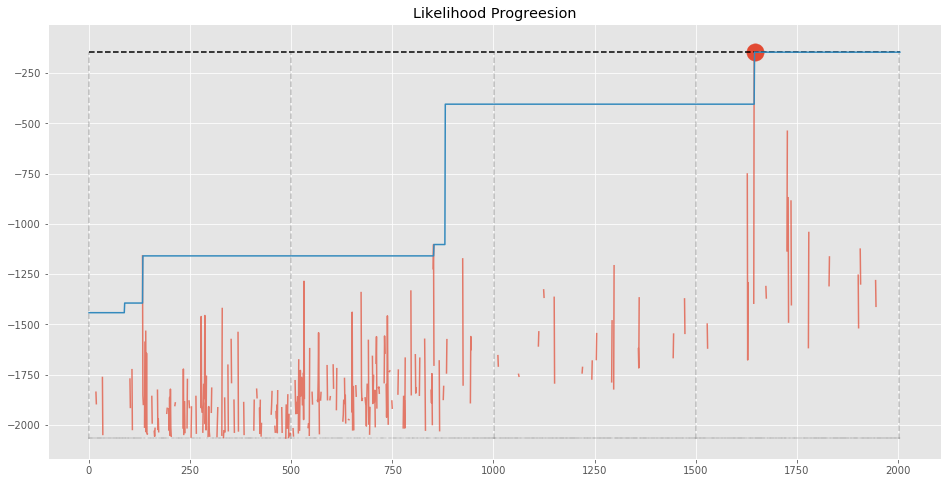

In [22]:
tally = 0
ll = mcmc['ll'][tally:,:].copy()
# print (ll)
# MLE
mle = mcmc['max_likelihood']
print(mle)
mle_place = np.where(ll[:,0] == mle)[0][0]
min_le = np.min(np.where(ll>=-99999, ll, 0))
best_vals = mcmc['chain'][mle_place,:]
print ("MLE: {:.2f} at {} with values: \n {}".format(mle, mle_place, best_vals), sep=",")


#
infs = np.where(ll[:,1]<-9999)[0]
fig, ax = plt.subplots( figsize=(16,8))
# ax.plot(ll, lw=0.2)
ax.plot(mcmc['ll'][tally:,1], alpha=0.7)
ax.plot(mcmc['ll'][tally:,0])
# ax.plot(mcmcs[1]['ll'][tally:,0])
# ax.plot(mcmcs[2]['ll'][tally:,0])
# MLE
ax.hlines(mle,0,len(mcmc['ll'])-tally,linestyles='--')
# 500 runs
ax.vlines(np.arange(1,len(mcmc['ll'])-tally,500), min_le,mle,linestyles='--', alpha = 0.2)
# infs rug
ax.vlines(infs, min_le, min_le+10, lw=0.051)
ax.scatter(mle_place, mle, s=300)
ax.set_title('Likelihood Progreesion')
# ax.set_xlim(left=1000)
plt.show()

0.710224438903
[ 0.006  0.004  0.     0.002]


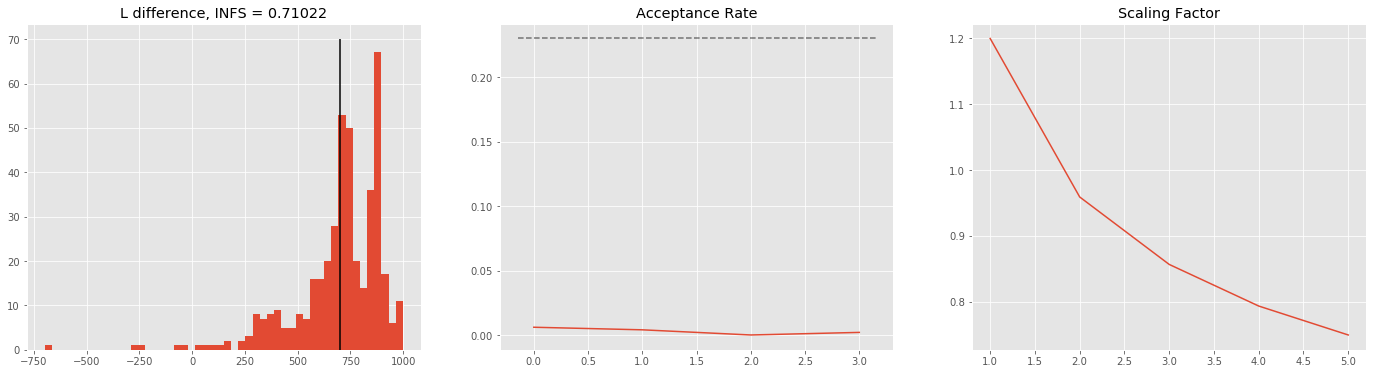

In [23]:
chain_tally(mcmc,0)
ll = chain_ll(mcmc)
fig, axs = plt.subplots(1,3,figsize=(24,6))
# likelihood difference
ax = axs[0]
tally = 0
ldiff = ll[tally:,0] - ll[tally:,-1]
ldiff_finite = ldiff[np.abs(ldiff)<1000]
# Number of -inf
print ((ll[:,1] < -9999).mean())
ax.hist(ldiff_finite, bins=50)
ax.set_title('L difference, INFS = {:.5f}'.format((ll[tally:,1] < -9999).mean()))
ax.vlines(ldiff_finite.mean(),0,70)

# Acceptence rate
ax = axs[1]
ax.plot(mcmc['rates'][1:])
print((mcmc['rates'][1:]))
ax.set_title('Acceptance Rate')
lims = ax.get_xlim()
ax.hlines(0.23, lims[0],lims[1],linestyles='--', alpha=0.5)
ax = axs[2]
ax.plot(np.arange(1,len(mcmc['scaling_factor'])+1), mcmc['scaling_factor'])
ax.set_title('Scaling Factor')
plt.show()

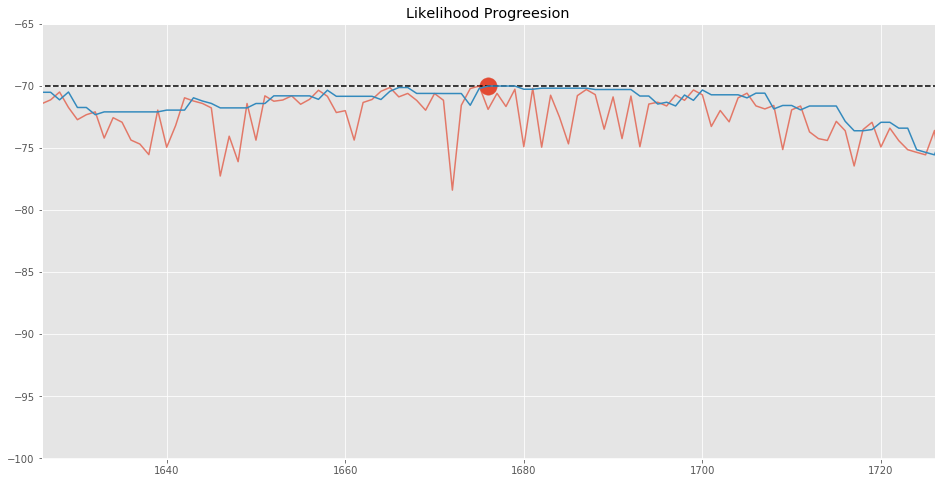

In [222]:
tally = 0
#
infs = np.where(ll[:,1]<-9999)[0]
fig, ax = plt.subplots( figsize=(16,8))
# ax.plot(ll, lw=0.2)
ax.plot(mcmc['ll'][tally:,1], alpha=0.7)
ax.plot(mcmc['ll'][tally:,0])
# MLE
ax.hlines(mle,0,len(mcmc['ll'])-tally,linestyles='--')
# 500 runs
ax.vlines(np.arange(1,len(mcmc['ll'])-tally,500), min_le,mle,linestyles='--', alpha = 0.2)
# infs rug
ax.vlines(infs, mle-10, mle-5, lw=0.151)
ax.scatter(mle_place, mle, s=300)
ax.set_title('Likelihood Progreesion')
ax.set_xlim(mle_place-50, mle_place+50)
ax.set_ylim(mle-30, mle+5)
plt.show()

Compare likelihood in the neighbourhood of the MLE

In [162]:
# np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=12)
# np.hstack((mcmc['guesses'],mcmc['ll']))

In [37]:
from_place = mle_place
print(from_place,'\n---')
for i in np.arange(-10,10):
    if i==0:
        print (">>>>>>                         ", end="")
    print (from_place + i, end =':     ')
    print (ll[from_place + i, 1], end='                  ')
    curr_vals = mcmc['guesses'][from_place + i, :]
#     curr_model,_ = run_model(state_0,r_start,r_end,*curr_vals)
    curr_model = mcmc['y_hat_M'][from_place + i,:,:]
    print (log_liklihood(curr_model,data_M,mcmc['sigma']))

2926 
---
2916:     -70.3514497672                  -70.3514497672
2917:     -70.2673020169                  -70.2673020169
2918:     -71.4840616901                  -71.4840616901
2919:     -72.5600383669                  -72.5600383669
2920:     -70.5899321219                  -70.5899321219
2921:     -72.9478614954                  -72.9478614954
2922:     -70.2366260626                  -70.2366260626
2923:     -72.2354854433                  -72.2354854433
2924:     -68.8861347551                  -68.8861347551
2925:     -68.3975197945                  -68.3975197945
>>>>>>                         2926:     -69.8705354626                  -69.8705354626
2927:     -69.0779293973                  -69.0779293973
2928:     -73.430896931                  -73.430896931
2929:     -69.3061284763                  -69.3061284763
2930:     -70.0959019327                  -70.0959019327
2931:     -69.6342808791                  -69.6342808791
2932:     -68.6331225086                  -68.633

## Summary
difference between LL for following runs

## Traces
### Chains

In [ ]:
plot_traces()

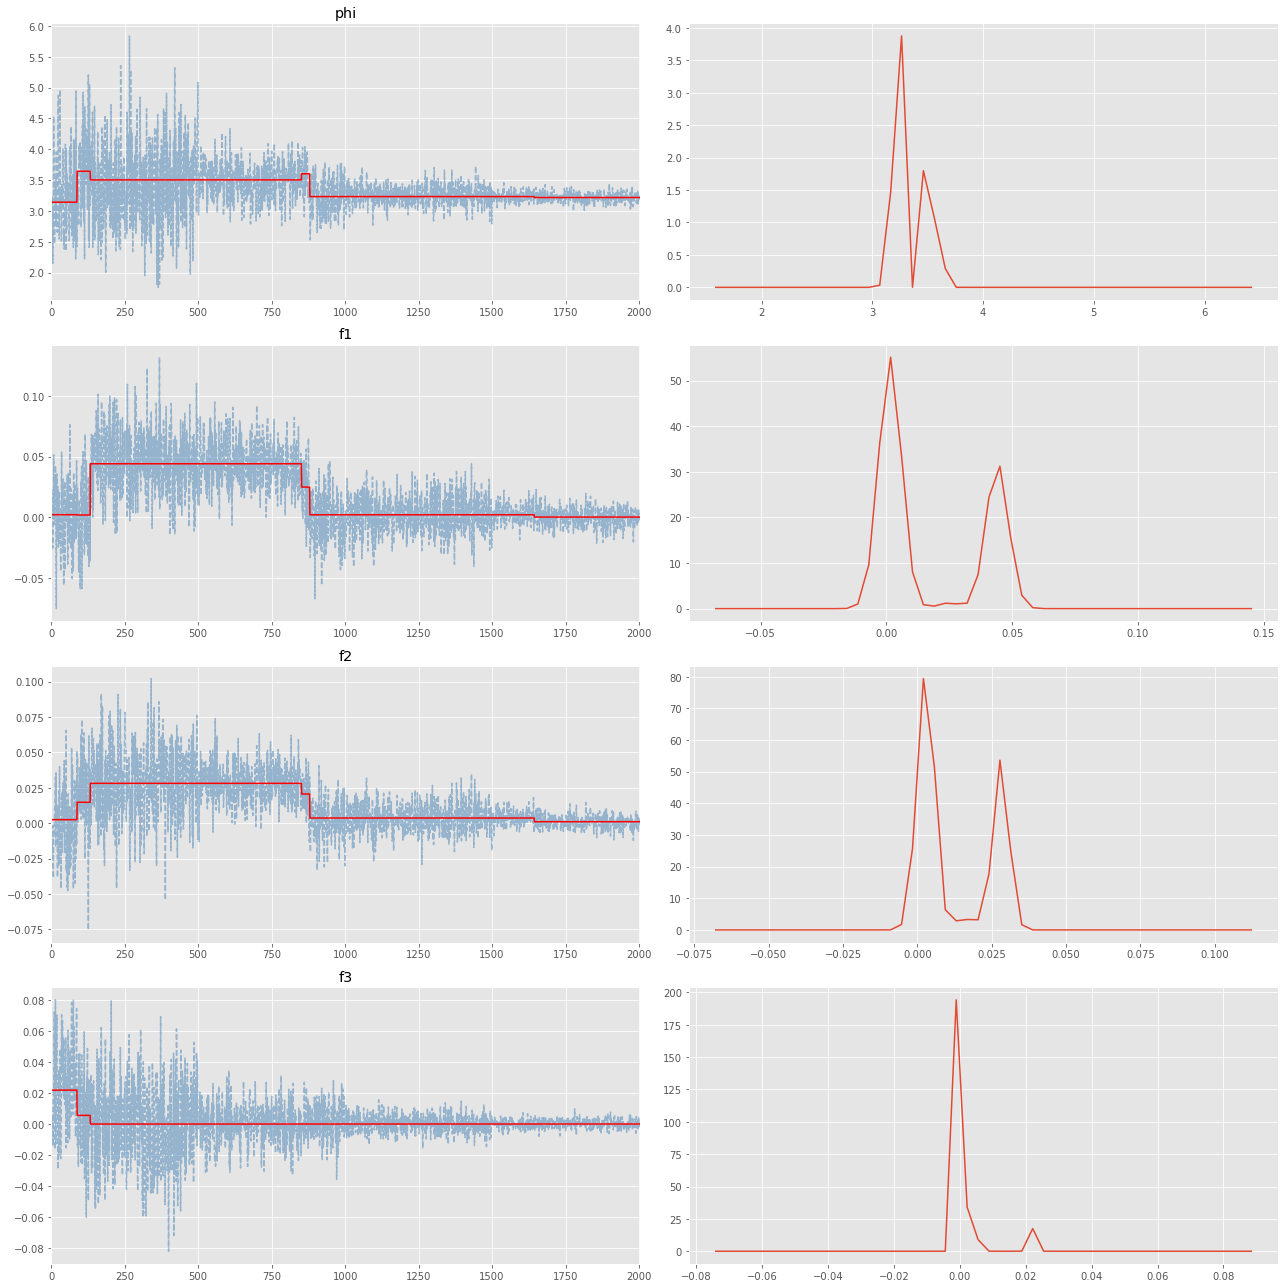

In [24]:

tally = -5000
# mcmc = mcmc0
chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]
# titles = ['$\Omega$','$\phi$',r'$\rho$','$f_1$','$f_2$','$f_3$']
titles = names
fig, axs = plt.subplots(len(titles),2, figsize=(18,18))
for i, name in enumerate(titles):
#     if i==2: continue
    ch = chain[:,i]
    ch = guesses[:,i]
#     print (ch)
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    a*=0.9
    b*=1.1
    ax = axs[i,0]
    ax.plot(guesses[:,i], color='steelblue', ls='--', alpha=0.5)
    ax.plot(chain[:,i], color='red')#, label = 'chain {}'.format(j))
    ax.set_title(name)
#     ax.set_ylim(a,b)
    ax.set_xlim(0, len(chain[:,i]))
#     ax.hlines([a,b],0,len(chain[:,i]),linestyles='--')
    # RIGHT
    density = kde(chain[:,i])
    xs = np.linspace(a,b,50)
    axs[i,1].plot(xs,density(xs))

plt.tight_layout()
plt.show()

In [156]:
cov_mat = np.corrcoef(chain[-1000:,:].T,)
print(np.abs(cov_mat))

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [217]:
mcmc['cov']

array([[ 0.050975744066,  0.000004778498, -0.000002210104, -0.000000171552],
       [ 0.000004778498,  0.000000009553, -0.000000001695, -0.000000000187],
       [-0.000002210104, -0.000000001695,  0.000000000624,  0.000000000034],
       [-0.000000171552, -0.000000000187,  0.000000000034,  0.000000000034]])

### For PPT
#### Chains

IndexError: index 4 is out of bounds for axis 1 with size 4

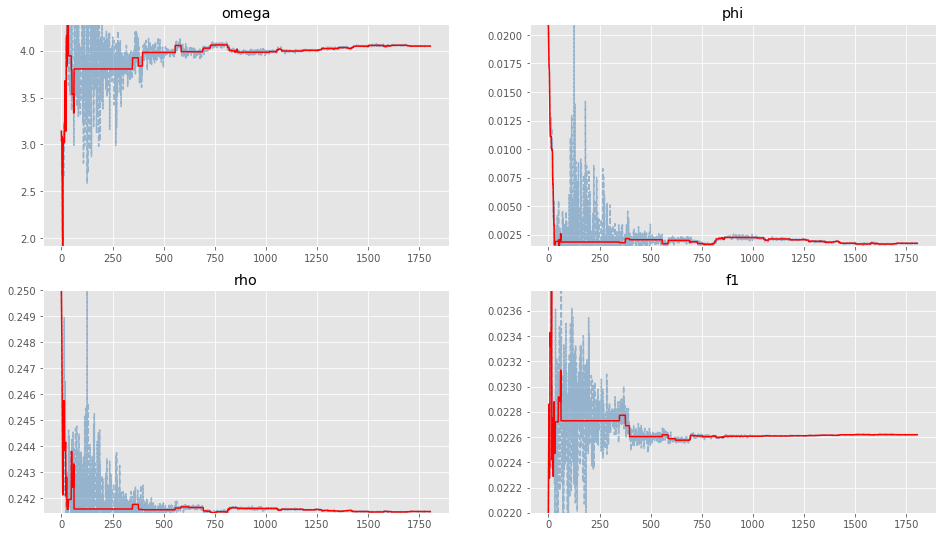

In [14]:
fig, axs = plt.subplots(2,2, figsize=(16,9))
axs = np.concatenate(axs)
tally = 0#-12500
mcmc = mcmc
chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]
# names = ["omega", "phi", "rho", "f1"]#,"f2","f3","e"]
for i, name in enumerate(names):
    ch = chain[:,i]
#     print (ch)
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    axs[i].plot(guesses[:,i], color='steelblue', ls='--', alpha=0.5)
    axs[i].plot(chain[:,i], color='red')#, label = 'chain {}'.format(j))

    axs[i].set_title(name)
    axs[i].set_ylim(a,b)
#     density = kde(chain[:,i])
#     xs = np.linspace(a,b,50)
#     axs[i,1].plot(xs,density(xs))
# ax = axs[-1]
# ax.imshow(cov_mat, cmap='YlOrRd')
# ax.imshow(cov_mat, cmap='seismic')
# ax.set_yticks([])
# ax.set_xticks([])
plt.tight_layout()
plt.show()

#### Distributions


[-1.  0.  1.  2.  3.  4.  5.]


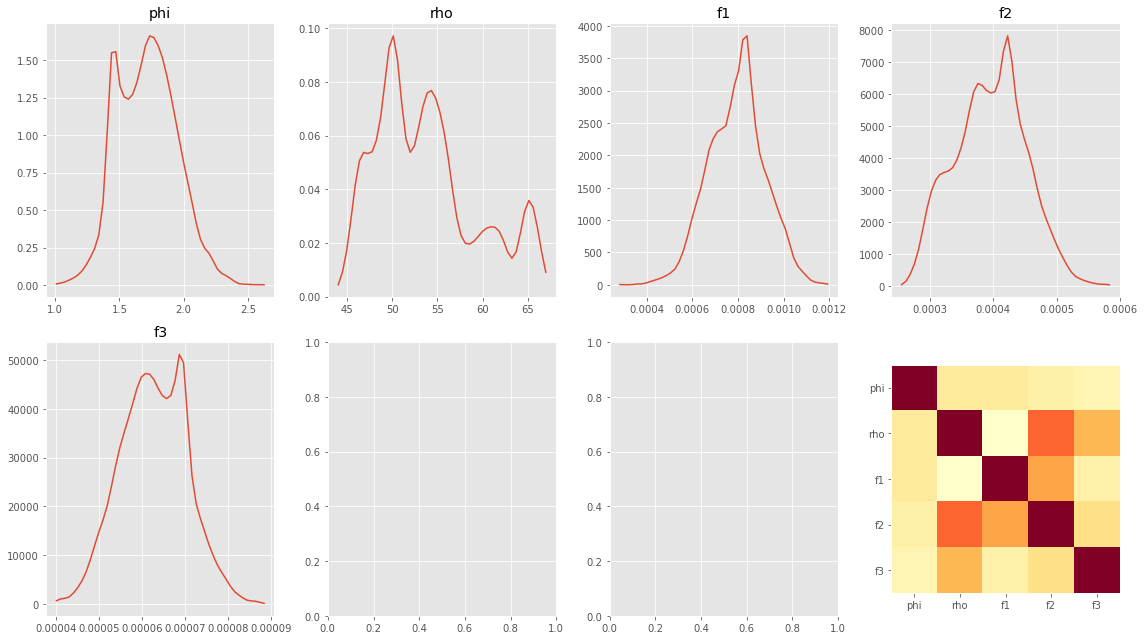

In [184]:
cov_mat = np.corrcoef(chain[-1000:,:].T,)
fig, axs = plt.subplots(2,4, figsize=(16,9))
axs = np.concatenate(axs)
tally = 0#-1000#-12500

chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]

for i, name in enumerate(names):
#     if i==2: continue
    ch = chain[:,i]
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    axs[i].set_title(name)
    
    density = kde(chain[:,i])
    xs = np.linspace(a,b,50)
    axs[i].plot(xs,density(xs))
ax = axs[-1]
ax.imshow(np.abs(cov_mat), cmap='YlOrRd')
# ax.imshow(cov_mat, cmap='seismic')
# ax.set_yticks([])
(np.arange(len(names)))
ax.set_xticklabels([""]+names)
ax.set_yticklabels([""]+names)
ax.grid(False)
print (ax.get_xticks())
plt.tight_layout()
plt.show()

In [107]:
cov_mat

array([[ 1.    , -0.3838,  0.1702, -0.0208, -0.0579],
       [-0.3838,  1.    , -0.1242, -0.1541, -0.0181],
       [ 0.1702, -0.1242,  1.    , -0.4734, -0.1387],
       [-0.0208, -0.1541, -0.4734,  1.    , -0.1804],
       [-0.0579, -0.0181, -0.1387, -0.1804,  1.    ]])

# Multiple Chain
## Load Model

In [19]:
# save_vers = '1021'
# save_mcmc(mcmc0, './chains/' + save_vers)
# save_mcmc(mcmc1, './chains/' + save_vers)
# save_mcmc(mcmc2, './chains/' + save_vers)

In [10]:
# './chains/0815'
vers = 'chains/'
vers = ''
print ('./' + vers + 'mcmc_0.pkl')
mcmc0 = load_mcmc('./' + vers + 'mcmc_0.pkl')
mcmc1 = load_mcmc('./' + vers + 'mcmc_1.pkl')
mcmc2 = load_mcmc('./' + vers + 'mcmc_2.pkl')
mcmcs = [mcmc0, mcmc1, mcmc2]
print (mcmc0['name'],': ',len(mcmc0['chain']))
names = mcmc0['names']
for mc in mcmcs:
    print (mc['max_likelihood'])

./mcmc_0.pkl
mcmc_0 :  11955
-68.410277033
-94.0608048722
-68.904116481


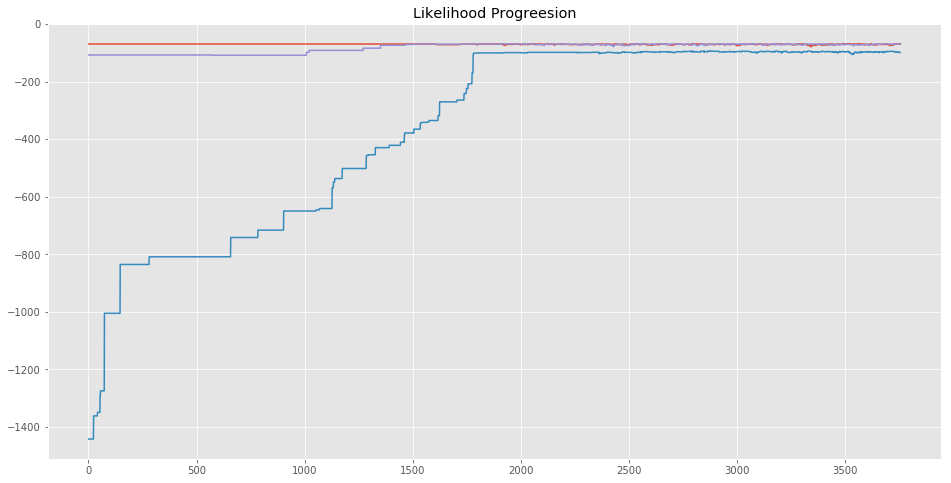

In [7]:
tally = 0
# print (ll)
# MLE
# print(mle)
# mle_place = np.where(ll[:,1] == mle)[0][0]
# min_le = np.min(np.where(ll>=-99999, ll, 0))
# best_vals = mcmc['chain'][mle_place,:]
# print ("MLE: {:.2f} at {} with values: \n {}".format(mle, mle_place, best_vals), sep=",")


#
fig, ax = plt.subplots( figsize=(16,8))
# ax.plot(ll, lw=0.2)

ax.plot(mcmcs[0]['ll'][tally:,0])
ax.plot(mcmcs[1]['ll'][tally:,0])
ax.plot(mcmcs[2]['ll'][tally:,0])
# MLE
# ax.hlines(mle,0,len(mcmcs[0]['ll'])-tally,linestyles='--')
# 500 runs
# ax.vlines(np.arange(1,len(mcmcs[0]['ll'])-tally,500), min_le,mle,linestyles='--', alpha = 0.2)
# infs rug
ax.set_title('Likelihood Progreesion')
# ax.set_xlim((0,1000))
plt.show()

In [13]:
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=12)
mcmcs[0]['gelman_rubin']

array([ 0.,  0.,  0.,  0.])

In [236]:
gr_curr = gelman_rubin(make_chains(mcmcs))
mcmcs[0]['gelman_rubin'] = np.vstack((mcmcs[0]['gelman_rubin'], gr_curr))

### Chains and Distributions

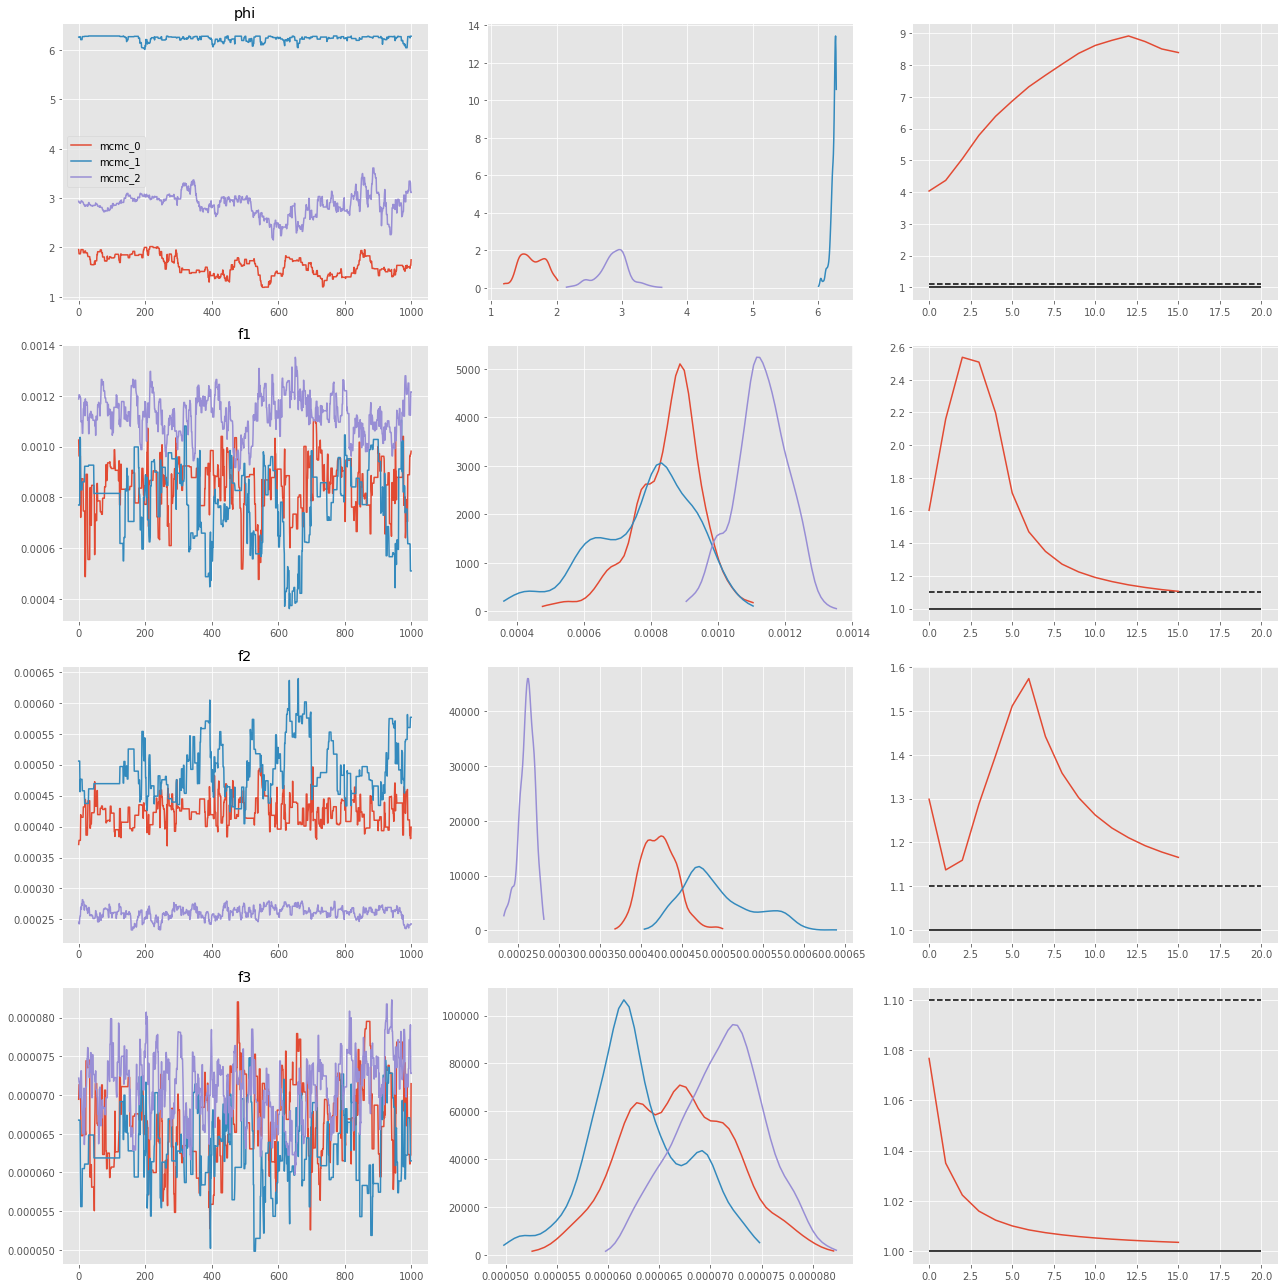

In [11]:
fig, axs = plt.subplots(len(mcmc0['active_params']),3, figsize=(18,18))
tally = -1000
for mc in mcmcs[:]:
    chain = mc['chain'][tally:,:]
    for i, name in enumerate(mc['active_params']):
#         if i==2: continue
        ch = chain[:,i]
#         print (ch)
#         a,b = dists[i].args
#         b+=a
        a, b = min(ch), max(ch)
#         axs[i,0].plot(guesses[:,i], color='steelblue', ls='--', alpha=0.5)
        axs[i,0].plot(chain[:,i], label = mc['name'])
        axs[i,0].set_title(mc['names'][name])

        density = kde(chain[:,i])
        xs = np.linspace(a,b,50)
        axs[i,1].plot(xs,density(xs))
for i, name in enumerate(mc['active_params']):
    axs[i,2].plot(mcmcs[0]['gelman_rubin'][1:,i])
    axs[i,2].hlines(1,0,20)
    axs[i,2].hlines(1.1,0,20,linestyles='--')
axs[0,0].legend()
plt.tight_layout()
plt.show()

In [241]:
mcmc0['gelman_rubin']

array([[ 0.                                                   ,  0.                                                   ,
         0.                                                   ,  0.                                                   ],
       [ 2.3573371595527294886096569825895130634307861328125  ,  1.625556691172520995536387999891303479671478271484375,
         1.049470773722600558386375269037671387195587158203125,  1.009189774899471814251228352077305316925048828125   ]])

In [242]:
mcmc0['chain'][-1,:]

array([ 2.028938001701779736407615928328596055507659912109375             ,
        0.000721759744411048197176850038658812991343438625335693359375    ,
        0.00043609920554466929769332761424038835684768855571746826171875  ,
        0.0000572189517063759179281434708030928959487937390804290771484375])

# Likelihood Analysis
See a chart of to lines for two models, with data scatterd

In [244]:
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=6)

## MLE Comparison

In [64]:
mcmc=mcmc1
best_vals = mcmc['chain'][mle_place,:]
print (best_vals)

# cest_vals = mcmc['guesses'][mle_place+1,:]
# print (best_vals)
bvals = best_vals.copy() #3.9287725897700483
# cvals = best_vals.copy()
# cvals[0] = cest_vals[0] 
# cvals[1] = cest_vals[1] 
# cvals[2] = cest_vals[2] 
# cvals[3] = cest_vals[3] 
# cvals[4] = cest_vals[4] 
# cvals[5] = cest_vals[5] 
# cvals[6] = cest_vals[6] 
g = np.ones(7)
g[mcmc['active_params']] = best_vals

print (g)
sl150 = np.append(np.arange(112), np.arange(116,192))
# print(vals)
zb, _ = run_model(state_0,r_start,r_end,*g)
# zc, _ = run_model(state_0,r_start,r_end,*cvals)
print ((bvals), log_liklihood(zb, data_M, mcmc['sigma']))
# print ((cvals), log_liklihood(zc, data_M, mcmc['sigma']))
# print (bvals/cvals)
# print(z[:10,:10])
###### Draw Figure 4####
# colors = 
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(months, zb[i, :], label=l, color='C{}'.format(i))
#     ax.plot(months, zc[i, :], label=l, linestyle='--', color='C{}'.format(i))
    ax.scatter(months[data_M[i,:]<150], data_M[i, :][data_M[i,:]<150])
ax.legend()
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax.set_title("LL: {}".format(log_liklihood(zb, data_M, mcmc['sigma'])))
ax = axs[1]
ax.plot(months, zb.sum(axis=0), color='grey')
# ax.plot(months, zc.sum(axis=0), color='grey', linestyle= '--')
ax.scatter(months[sl150], data_M.sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()

IndexError: index 11897 is out of bounds for axis 0 with size 5

In [245]:
t1 = data_M.mean(axis=1)
# np.vstack()
zb = np.repeat(t1, 192,axis=0).reshape(3,192)
print ((bvals), log_liklihood(zb, data_M, mcmc['sigma']))
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(months, zb[i, :], label=l, color='C{}'.format(i))
#     ax.plot(months, zc[i, :], label=l, linestyle='--', color='C{}'.format(i))
    ax.scatter(months, data_M[i, :])
ax.legend()
ax.set_title("LL: {}".format(log_liklihood(zb, data_M, mcmc['sigma'])))
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax = axs[1]
ax.plot(months, zb.mean(axis=0), color='grey')
# ax.plot(months, zc.sum(axis=0), color='grey', linestyle= '--')
ax.scatter(months[sl150], data_M.sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()

NameError: name 'bvals' is not defined

In [87]:
mcmc['chain'][-100,:]

array([  3.7392,   1.3714,  61.3438,   0.0006,   0.0004,   0.0001])

In [88]:
mcmc['ll'][-100,:]

array([-88.818 , -88.8338])

## Likelihood Cloud

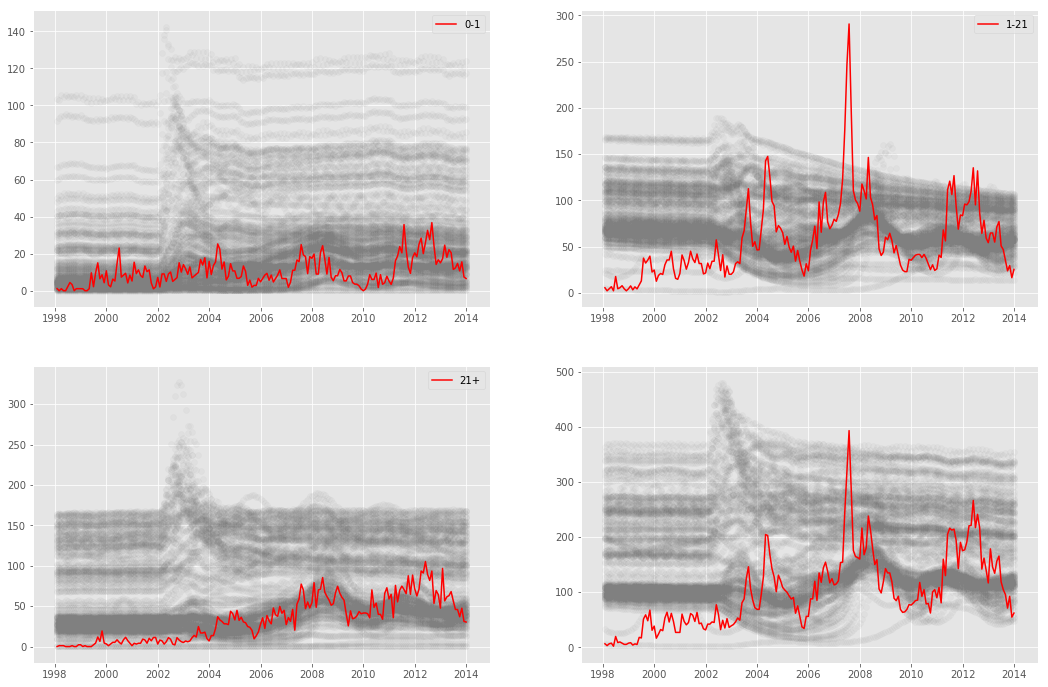

In [82]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = np.hstack(axs)
labels = ['0-1', '1-21', '21+']
from_place = mle_place
for j in np.arange(-1000,1000):
    chain_place = from_place + j
#     curr_vals = mcmc['guesses'][chain_place, :]
#     curr_model,_ = run_model(state_0,r_start,r_end,*curr_vals)
#     print(mcmc['accepted'][chain_place],end=' ')
    if mcmc['accepted'][chain_place] == 0: continue
    curr_model = mcmc['y_hat_M'][j,:,:]
    for i, l in enumerate(labels):
        ax = axs[i]
        if i >=3:
            continue
        ax.scatter(months, curr_model[i, :], color='grey', alpha=0.051)
        

    ax = axs[3]
    ax.scatter(months, curr_model.sum(axis=0), color='grey', alpha=0.0511)

# ax.set_ylim

for i, l in enumerate(labels):
    ax = axs[i]
    ax.plot(months, data_M[i, :], color='red', label=l)
    ax.legend()
ax = axs[3]
ax.plot(months, data_M.sum(axis=0), c='red')
plt.show()

In [74]:
np.any(mcmc['y_hat_M'][j,:,:]>400)

False

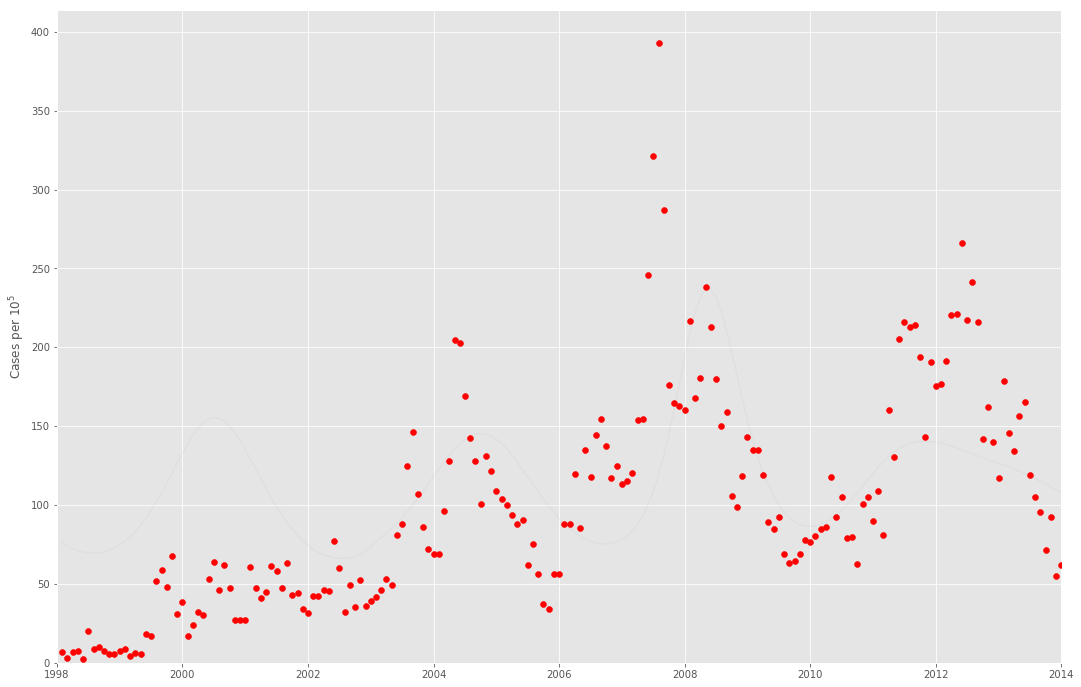

In [137]:
fig, axs = plt.subplots(1, figsize=(18, 12))
# axs = np.hstack(axs)
# labels = ['0-1', '1-21', '21+']
from_place = mle_place
# from_place = 0
# for j in np.arange(-1500,1500):
for j in np.arange(-1000,0):
    chain_place = from_place + j
    if mcmc['accepted'][chain_place] == 0: continue
#     if np.any(mcmc['y_hat_M'][chain_place,:,:] > 400): continue    
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(months, curr_model.sum(axis=0), color='grey', alpha=0.05)
ax.scatter(months, data_M.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

In [ ]:
# for ppt
fig, axs = plt.subplots(1, figsize=(16, 9))
# axs = np.hstack(axs)
# labels = ['0-1', '1-21', '21+']
from_place = mle_place
# from_place = 0
for j in np.arange(-600,600):
# for j in np.arange(36999):
    chain_place = from_place + j
#     if mcmc['accepted'][chain_place] == 0: continue
#     if np.any(mcmc['y_hat_M'][chain_place,:,:] > 400): continue    
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(months, curr_model.sum(axis=0), color='grey', alpha=0.02)
ax.scatter(months, data_M.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

### For PPT

In [40]:
###### FOR PPT
best_vals = mcmc['guesses'][mle_place,:]

# print (best_vals)
bvals = best_vals.copy() #3.9287725897700483

# print(vals)
zb, _ = run_model(state_0,r_start,r_end,*bvals)

print ((bvals), log_liklihood(zb, data_M, mcmc['sigma']))

print (bvals/cvals)
# print(z[:10,:10])
###### Draw Figure 4####
# colors = 

fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(months, zb[i, :], label=l, color='C{}'.format(i))
    ax.scatter(months, data_M[i, :])
ax.legend()
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")


ax = axs[1]
from_place = mle_place
for j in np.arange(-600,600):
    chain_place = from_place + j
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax.plot(months, curr_model.sum(axis=0), color='grey', alpha=0.02)
ax.scatter(months, data_M.sum(axis=0), c='k',zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
# ax.plot(months, zb.sum(axis=0), color='grey')
# # ax.plot(months, zc.sum(axis=0), color='grey', linestyle= '--')
# ax.scatter(months, data_M.sum(axis=0), c='grey')
# ax.set_ylim
# ax.set_xlabel("Year")

plt.show()

[ 4.3342  0.8495  1.5069  0.0243  0.0049  0.0016] -240.426033955


NameError: name 'cvals' is not defined

In [38]:
# for k,v in mcmc.items():
#     if k in ['chain','monthly', 'y_now_M', 'y_hat_M', 'guesses', 'datax','datay']:
#         continue
#     print (k,'\n',v,'\n\n\n')
# print (mcmc['accepted'].size)

In [ ]:
(B(tst, tst1, np.pi) == B(tst, tst1, np.pi).max()).sum()

In [90]:
# mcmc['y_hat_M'][mle_place,:,:]

# PAPER

## A
Image of Model compartments

## B

## C Cloud

2926


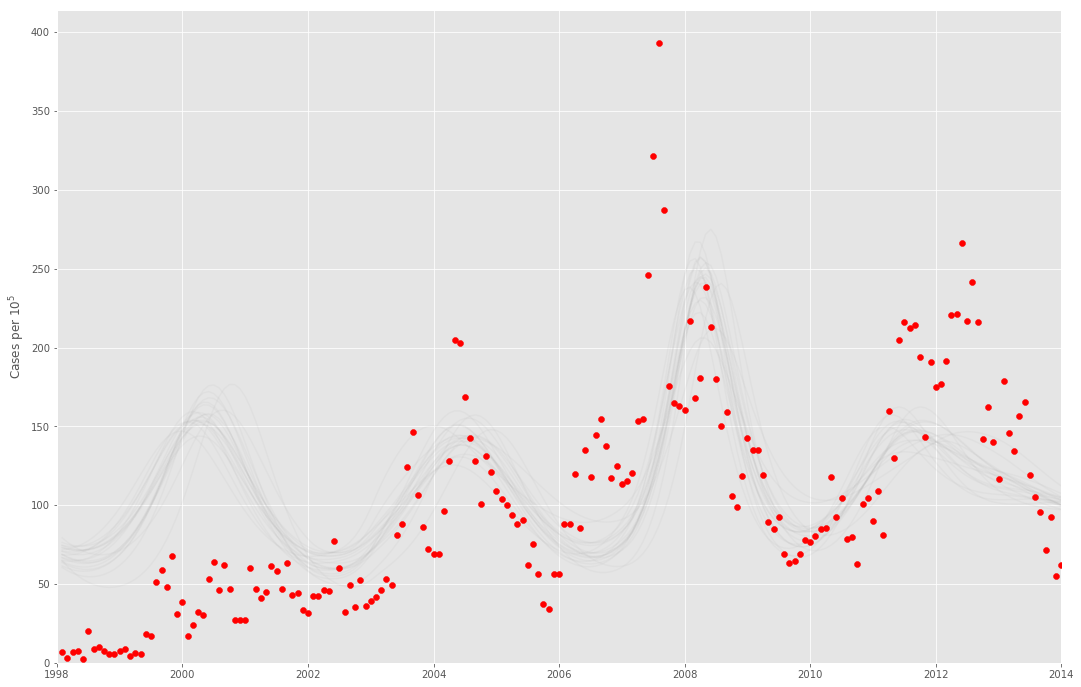

In [16]:
fig, axs = plt.subplots(1, figsize=(18, 12))
# axs = np.hstack(axs)
# labels = ['0-1', '1-21', '21+']
from_place = mle_place
print (from_place)
# for j in np.arange(-1500,1500):
for j in np.arange(0,20):
    chain_place = from_place + j
#     if mcmc['accepted'][chain_place] == 0: continue
#     if np.any(mcmc['y_hat_M'][chain_place,:,:] > 400): continue    
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(months, curr_model.sum(axis=0), color='grey', alpha=0.05)
ax.scatter(months, data_M.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

## D Bars

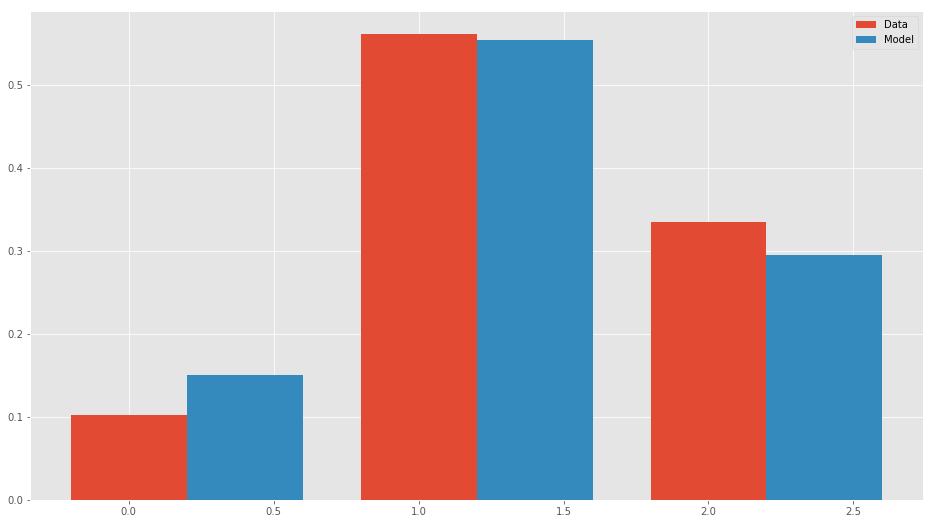

In [249]:
data_age_dist = data_M.sum(axis=1)
data_age_dist /= data_age_dist.sum()

y_age_dist = mcmc['y_hat_M'][mle_place,:,:].sum(axis=1)
y_age_dist /= y_age_dist.sum()

x = np.arange(len(data_age_dist))
fig, ax = plt.subplots(figsize=(16,9))
# https://matplotlib.org/2.0.0/examples/api/barchart_demo.html
width = 0.4
ax.bar(x,data_age_dist, width, label="Data")
ax.bar(x+width, y_age_dist, width, label="Model")

ax.legend()

# Best Values 


In [52]:
# Parameters
state_0 = mcmc['state_0']

# sys.exit("After collect state 0")
###################################################################################################################
#########################                            Run                         ##################################
###################################################################################################################

# Parameters

# om, phi, rho, f1, f2, f3, e = best_vals
om, phi, e = 0,0,1
rho, f1,f2,f3 = best_vals
f = np.concatenate((nums(f1, sc[0]), nums(f2, sc[1]), nums(f3, sc[2])))
print('***Initial Params***')
print(om, phi, rho, f1, f2, f3, e)
# Solve system
clk = clock()
years_prior = 10
y_0 = difference_model(state_0, r_start - years_prior, r_start,
                       rho, om, phi, f, e,
                       r=20, full_output=True)
print(y_0[3].shape)
state_0 = [yi[:, -1] for yi in y_0]

r = 3
y = difference_model(state_0, r_start, r_end+10,
                     rho, om, phi, f, e,
                     r=r, full_output=True)

print("TIME: ", clock() - clk)

***Initial Params***
0 0 20.5182686249 0.00159387902712 0.000805945090712 0.000179879441059 1
(27, 2400)
TIME:  2.3708114403518046


In [86]:
# [yi[:, -1] for yi in y]

In [138]:
A = y[7].sum(axis=0)
A_0 = y_0[7].sum(axis=0)
names = ["Susceptible", "Vaccinated aP", "Vaccinated wP", "Infected Is", "Infected Ia", "Recovered", "Healthy", "All",
         "New"]
order = [0, 2, 3, 4, 7]
x = np.arange(r_start, r_end+10, N / r)
Y = [y[i] for i in order]
Y_0 = [y_0[o].sum(axis=0) for o in order]
names = [names[i] for i in order]
draw_ages = range(9) # [0, 1, 2, -1, -2]
pop = np.genfromtxt('./data/demographics/birth_rate.csv', delimiter=',', usecols=[0, 2], skip_header=1)

##### Draw Figure 1#### Normalized
fig1, ax1 = draw_model(x, [yi / A for yi in Y], names, split=2, collapse=True, ages=draw_ages)
fig1.suptitle("Normalized", fontsize=20)
# print(A_0)

ax1[4].plot(pop[:, 0], 1000 * pop[:, 1], label="Real", c='k')
normalizer = A_0
for i, yo in enumerate(Y_0):
    ax1[i].plot(np.linspace(r_start - years_prior, r_start, len(yo)), yo / normalizer)

###### Draw Figure 2#### TOTALS
fig2, ax2 = draw_model(x, [yi / 1 for yi in Y], names, split=2, collapse=True, ages=draw_ages)
fig2.suptitle("Total", fontsize=20)
# print(A_0)
ax2[4].plot(pop[:, 0], 1000 * pop[:, 1], label="Real", c='k')  # Real Population
normalizer = 1
for i, yo in enumerate(Y_0):
    ax2[i].plot(np.linspace(r_start - years_prior, r_start, len(yo)), yo / normalizer)
    
    

NameError: name 'y' is not defined

# GR

In [35]:
gelman_rubin([mc['chain'][:5000,:] for mc in mcmcs])

array([ 1.1129,  1.8775,  1.7929,  1.0205,  1.2004,  1.01  ])